# Kaggle Rossman
#https://www.kaggle.com/c/lspoons-rossman/data 데이터 다운로드
#lspoons_train.csv - 학습 데이터
#lspoons_test.csv - 예측해야 할 test 데이터
#sample_submission.csv - 예시 제출 파일
#store.csv - 상점에 대한 정보가 담긴 보조 데이터

In [5]:
import os
import pandas as pd

In [9]:
test = pd.read_csv('lspoons_test.csv')
train = pd.read_csv('lspoons_train.csv')
store = pd.read_csv('store.csv')

In [10]:
train.head()

,id,Store,Date,Sales,Promo,StateHoliday,SchoolHoliday
0,14929,85,2015-05-01,11360,1,a,0
1,14930,512,2015-05-01,10534,1,a,0
2,14931,1097,2015-05-01,17039,1,a,0
3,14932,1,2015-04-30,6228,1,0,0
4,14933,9,2015-04-30,9717,1,0,0


- Sales ; 매출 기록
- Prome : 해당 날짜 프로모션 진행 했는지 여부 1,0
- StateHoliday : 해당 날짜가 공유일 인지 0,a,b,c
- SchoolHoliday : 학교 휴교일 여부 0,1

In [11]:
train['Promo'].value_counts()

0    32813
1    29431
Name: Promo, dtype: int64

In [12]:
train['StateHoliday'].value_counts()

0    62208
a       18
b       13
c        5
Name: StateHoliday, dtype: int64

In [13]:
train['SchoolHoliday'].value_counts()

0    49567
1    12677
Name: SchoolHoliday, dtype: int64

In [14]:
test.head()

,id,Store,Date,Promo,StateHoliday,SchoolHoliday
0,0,1,2015-07-01,1,0,0
1,1,9,2015-07-01,1,0,1
2,2,11,2015-07-01,1,0,0
3,3,12,2015-07-01,1,0,0
4,4,14,2015-07-01,1,0,1


#  StateHoliday 변수 변화

- 범주형 데이터 원 핫 인코딩


In [15]:
train = pd.get_dummies(columns = ['StateHoliday'], data = train)
test = pd.get_dummies(columns = ['StateHoliday'], data = test)

In [16]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,14929,85,2015-05-01,11360,1,0,0,1,0,0
1,14930,512,2015-05-01,10534,1,0,0,1,0,0
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0
3,14932,1,2015-04-30,6228,1,0,1,0,0,0
4,14933,9,2015-04-30,9717,1,0,1,0,0,0


In [17]:
test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,0,1,2015-07-01,1,0,1,0
1,1,9,2015-07-01,1,1,1,0
2,2,11,2015-07-01,1,0,1,0
3,3,12,2015-07-01,1,0,1,0
4,4,14,2015-07-01,1,1,1,0


In [18]:
test['StateHoliday_b'] = 0
test['StateHoliday_c'] = 0

In [19]:
test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,0,1,2015-07-01,1,0,1,0,0,0
1,1,9,2015-07-01,1,1,1,0,0,0
2,2,11,2015-07-01,1,0,1,0,0,0
3,3,12,2015-07-01,1,0,1,0,0,0
4,4,14,2015-07-01,1,1,1,0,0,0


# Date 변수를 활용한 피처 엔지니어링

In [20]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [21]:
train['Weekday'] = train['Date'].dt.weekday
test['Weekday'] = test['Date'].dt.weekday

In [22]:
train['Year'] = train['Date'].dt.year
test['Year'] = test['Date'].dt.year

In [23]:
train['Month'] = train['Date'].dt.month
test['Month'] = test['Date'].dt.month

In [24]:
test.head()

,id,Store,Date,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Weekday,Year,Month
0,0,1,2015-07-01,1,0,1,0,0,0,2,2015,7
1,1,9,2015-07-01,1,1,1,0,0,0,2,2015,7
2,2,11,2015-07-01,1,0,1,0,0,0,2,2015,7
3,3,12,2015-07-01,1,0,1,0,0,0,2,2015,7
4,4,14,2015-07-01,1,1,1,0,0,0,2,2015,7


# 베이스라인 모델링

In [25]:
from xgboost import XGBRegressor

In [26]:
xgb = XGBRegressor(n_estimators = 300, learning_rate = 0.1, random_state = 2021)

In [27]:
xgb.fit(train[['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','Weekday','Year','Month']], train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=2021, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [28]:
test['Sales'] = xgb.predict(test[['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','Weekday','Year','Month']])

In [29]:
test[['id','Sales']].to_csv("submission.csv", index = False)

# 변수 선택

- 변수 중요도

In [30]:
xgb.feature_importances_

array([7.0119292e-01, 5.6813221e-02, 8.5970303e-03, 3.9727520e-03,
       1.7045721e-03, 8.6084956e-06, 8.5364915e-02, 5.7804018e-02,
       8.4541962e-02], dtype=float32)

In [31]:
input_var = ['Promo','SchoolHoliday','StateHoliday_0','StateHoliday_a','StateHoliday_b','StateHoliday_c','Weekday','Year','Month']

In [32]:
imp_df = pd.DataFrame({"var" : input_var,
                      "imp" : xgb.feature_importances_})

imp_df

,var,imp
0,Promo,0.701193
1,SchoolHoliday,0.056813
2,StateHoliday_0,0.008597
3,StateHoliday_a,0.003973
4,StateHoliday_b,0.001705
5,StateHoliday_c,0.000009
6,Weekday,0.085365
7,Year,0.057804
8,Month,0.084542


In [33]:
imp_df = imp_df.sort_values(['imp'], ascending = False)

<BarContainer object of 9 artists>

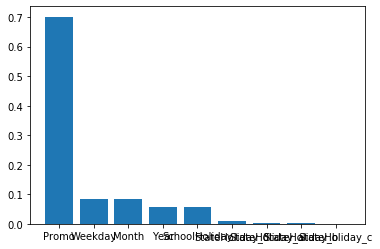

In [34]:
import matplotlib.pyplot as plt
plt.bar(imp_df['var'], imp_df['imp'])

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

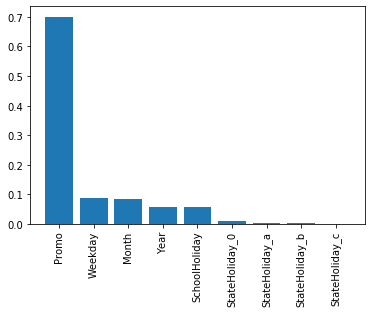

In [35]:
plt.bar(imp_df['var'], imp_df['imp'])
plt.xticks(rotation = 90)

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score(xgb, train[input_var], train['Sales'], scoring = 'neg_mean_squared_error', cv = 3)

array([ -7442398.68110158, -10165475.69817356,  -7896996.52747543])

- 중요도 높은 변수만 측정

In [38]:
cross_val_score(xgb, train[['Promo','Weekday','Month','Year','SchoolHoliday']], train['Sales'], scoring = 'neg_mean_squared_error', cv = 3)

array([ -7437417.60656606, -10109891.53781048,  -7579785.74399885])

- 변수중요도가 중요한 순서대로 input 변수를 늘려가며 cross validation을 실행
- cross validation 결과물을 score_list에 저장

In [39]:
import numpy as np
score_list= []
selected_varnum = []

In [40]:
for i in range(1,10):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb, train[selected_var], train['Sales'], scoring = 'neg_mean_squared_error', cv = 3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

1
2
3
4
5
6
7
8
9


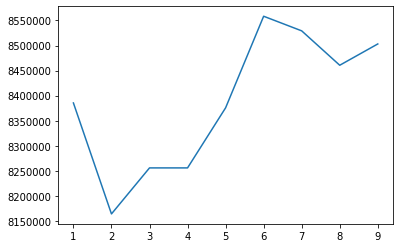

In [41]:
plt.plot(selected_varnum, score_list)

In [42]:
cross_val_score(xgb, train[['Promo', 'Weekday']], train['Sales'], scoring = 'neg_mean_squared_error', cv = 3)

array([ -7241548.38898523, -10134534.97381444,  -7116067.92521244])

In [43]:
xgb.fit(train[['Promo','Weekday']],
        train['Sales'])
test['Sales'] = xgb.predict(test[['Promo','Weekday']])
test[['id','Sales']].to_csv("submission1.csv",index=False)

# Store 데이터 활용

In [44]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [45]:
train = pd.merge(train, store, on = ['Store'], how = 'left')
test = pd.merge(test, store, on = ['Store'], how = 'left')

In [46]:
train.head()

,id,Store,Date,Sales,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,...,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,14929,85,2015-05-01,11360,1,0,0,1,0,0,...,5,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN
1,14930,512,2015-05-01,10534,1,0,0,1,0,0,...,5,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
2,14931,1097,2015-05-01,17039,1,0,0,1,0,0,...,5,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN
3,14932,1,2015-04-30,6228,1,0,1,0,0,0,...,4,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,14933,9,2015-04-30,9717,1,0,1,0,0,0,...,4,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


- 경쟁업체가 언제 개장했는지 여부를 competitionopen 변수에 저장


In [47]:
train['CompetitionOpen'] = 12*( train['Year'] - train['CompetitionOpenSinceYear'] ) + \
                             (train['Month'] - train['CompetitionOpenSinceMonth'])

test['CompetitionOpen'] = 12*( test['Year'] - test['CompetitionOpenSinceYear'] ) + \
                             (test['Month'] - test['CompetitionOpenSinceMonth'])

- dt.weekofyear 함수를 통해 몇번째 주 인지 파악


In [48]:
train['WeekOfYear'] = train['Date'].dt.weekofyear
test['WeekOfYear'] = test['Date'].dt.weekofyear

- 프로모션이 시작된지 얼마나 되었는지를 promoopen 변수에 저장합니다.

In [49]:
train['PromoOpen'] = 12* ( train['Year'] - train['Promo2SinceYear'] ) + \
                        (train['WeekOfYear'] - train['Promo2SinceWeek']) / 4

test['PromoOpen'] = 12* ( test['Year'] - test['Promo2SinceYear'] ) + \
                        (test['WeekOfYear'] - test['Promo2SinceWeek']) / 4

In [50]:
train.dtypes

id                                    int64
Store                                 int64
Date                         datetime64[ns]
Sales                                 int64
Promo                                 int64
SchoolHoliday                         int64
StateHoliday_0                        uint8
StateHoliday_a                        uint8
StateHoliday_b                        uint8
StateHoliday_c                        uint8
Weekday                               int64
Year                                  int64
Month                                 int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
CompetitionOpen                 

- object 변수 원핫인코딩

In [51]:
train = pd.get_dummies(columns = ['StoreType'], data = train)
test = pd.get_dummies(columns = ['StoreType'], data = test)

train = pd.get_dummies(columns = ['Assortment'], data = train)
test = pd.get_dummies(columns = ['Assortment'], data = test)

train = pd.get_dummies(columns = ['PromoInterval'], data = train)
test = pd.get_dummies(columns = ['PromoInterval'], data = test)

# 2차 모델링

In [52]:
train.columns

Index(['id', 'Store', 'Date', 'Sales', 'Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Weekday', 'Year', 'Month', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'CompetitionOpen', 'WeekOfYear',
       'PromoOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [53]:
input_var = ['Promo', 'SchoolHoliday',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'Weekday', 'Year', 'Month', 'CompetitionDistance',
       'Promo2',
       'CompetitionOpen', 'WeekOfYear',
       'PromoOpen', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec']

In [54]:
xgb = XGBRegressor( n_estimators = 300, learning_rate = 0.1, random_state = 2021)

In [55]:
xgb.fit(train[input_var], train['Sales'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=2021, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
imp_df = pd.DataFrame({'var' : input_var, 'imp' : xgb.feature_importances_})

In [146]:
imp_df = imp_df.sort_values(['imp'], ascending = False)

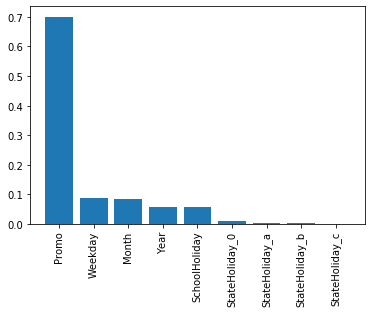

In [147]:
plt.bar(imp_df['var'], imp_df['imp'])
plt.xticks(rotation = 90)
plt.show()

In [148]:
socre_list = []
selected_varnum = []

In [149]:
len(input_var)

24

In [71]:
for i in range(1,25):
    selected_var = imp_df['var'].iloc[:i].to_list()
    scores = cross_val_score(xgb, train[selected_var], train['Sales'], scoring = 'neg_mean_squared_error', cv = 3)
    score_list.append(-np.mean(scores))
    selected_varnum.append(i)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [157]:
input_var2 = imp_df['var'].iloc[:17].tolist()

In [158]:
cross_val_score(xgb, train[input_var2], train['Sales'], scoring = 'neg_mean_squared_error', cv = 3)

array([ -7454304.06832015, -10165495.73146801,  -7889522.04682967])

In [159]:
input_var = imp_df['var'].iloc[:17].tolist()
xgb.fit(train[input_var],
        train['Sales'])

test['Sales'] = xgb.predict(test[input_var])

test[['id','Sales']].to_csv("submission2.csv",index=False)

# 파라미터 튜닝

- n_estimators 파라미터를 최적화시키는 작업을 진행

In [160]:
estim_list = [100,200,300,400,500,600,700,800,900]
score_list = []

In [161]:
for i in estim_list:
    xgb = XGBRegressor( n_estimators=i, learning_rate= 0.1, random_state=2021)
    scores = cross_val_score(xgb, train[input_var], train['Sales'], scoring="neg_mean_squared_error", cv=3)
    score_list.append(-np.mean(scores))
    print(i)

100
200
300
400
500
600
700
800
900


(array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 11 Text xticklabel objects>)

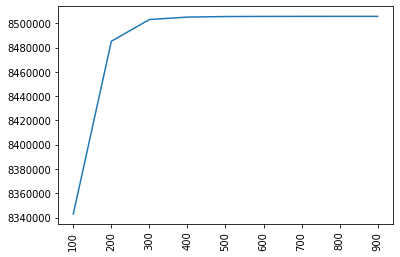

In [162]:
plt.plot(estim_list,score_list)
plt.xticks(rotation=90)